This data is about predicting the Hospital Charges based on 7 features. I am assuming that Age, BMI and Smoking will be the most important features. Let's Investigate. 

Importing all the necessary libraries.

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
#only required if you are working with Colab. Select the insurance.csv file from your local drive.
from google.colab import files # comment if not using the colab
uploaded = files.upload()      # comment if not using the colab

Saving insurance.csv to insurance.csv


Reading data into the workspace and checking first 5 records. 

In [31]:
data= pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Exploratory Data analysis**

Checking the dimension of the data (rows*columns) and checking all the column names.

In [7]:
data.shape,data.columns

((1338, 7),
 Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object'))

Dataframe.describe method show the summary statistics of the numerical variables.

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Checking the the type of all the variables in the dataset also checking whether the data have any missing values or not.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Checking the summary statistics of the Categorical variables.

In [13]:
data.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [14]:
data['smoker'].value_counts(normalize=True)   # Checking the count of the smoker variable.

no     0.795217
yes    0.204783
Name: smoker, dtype: float64

Checking the number of males and females, who smokes. 159 males and 115 females Smokes.

Similarly  517 males and 547 females do not smoke.

In [15]:
data[(data['smoker'] == 'yes') & (data['sex'] == 'male')].shape, data[(data['smoker'] == 'yes') & (data['sex'] == 'female')].shape

((159, 7), (115, 7))

In [16]:
data[(data['smoker'] == 'no') & (data['sex'] == 'male')].shape,data[(data['smoker'] == 'no') & (data['sex'] == 'female')].shape

((517, 7), (547, 7))

In [17]:
data.sort_values(by=['charges','age'],ascending=False).head()  #Sorting the data according to the charges incured.

,age,sex,bmi,children,smoker,region,charges
543,54,female,47.410,0,yes,southeast,63770.42801
1300,45,male,30.360,0,yes,southeast,62592.87309
1230,52,male,34.485,3,yes,northwest,60021.39897
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209


Checking whether the charges are increasing with age or not. Found that the assumption was correct.

In [18]:
print("Mean Charges as Age increases, ","Age= 40 :",data[data['age']>40]['charges'].mean(),",", 
"Age= 45 :", data[data['age']>45]['charges'].mean(),",", "Age= 50: " ,data[data['age']>50]['charges'].mean())

Mean Charges as Age increases,  Age= 40 : 16627.958486718988 , Age= 45 : 17200.42870424 , Age= 50:  18084.98722294943


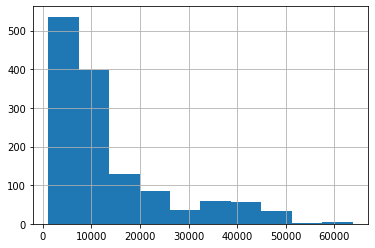

In [19]:
data['charges'].hist() #checking the distribution of charges.

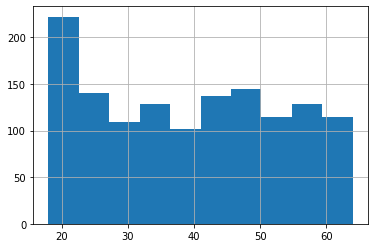

In [21]:
data['age'].hist()  #checking the distribution of Age.

BMI is almost normally distributed


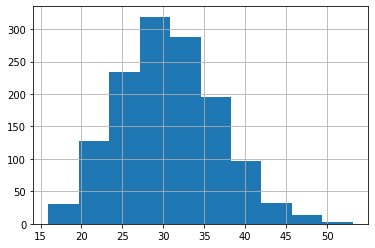

In [24]:
data['bmi'].hist() #checking the distribtion of BMI.

print("BMI is almost normally distributed")

In [25]:
data['region'].value_counts() # checking the records from different regions

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Found that Southeast region have bigger 3rd quartile and have some far outliers as well.

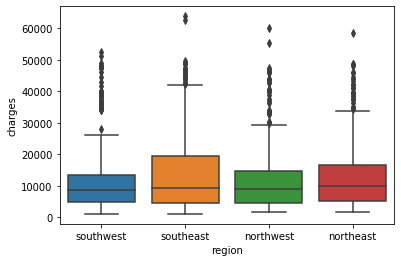

In [0]:
sns.boxplot(data['region'],data['charges'])  # checking the distribution of charges with Region

Men have wider distribution and a long tail than women


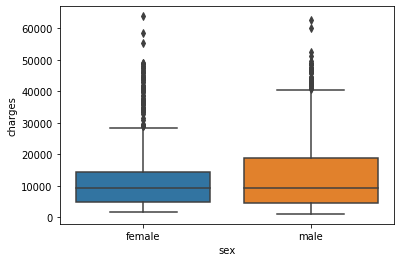

In [26]:
sns.boxplot(data['sex'],data['charges']) 

print("Men have wider distribution and a long tail than women")

This is quite interesting that men and women who smokes have significantly high charges than who don't smoke.

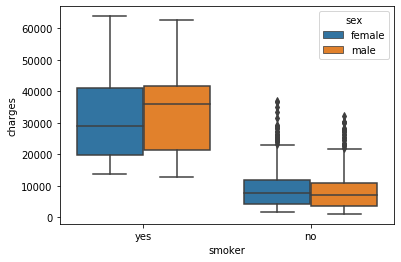

In [27]:
sns.boxplot(data['smoker'],data['charges'],hue=data['sex'])

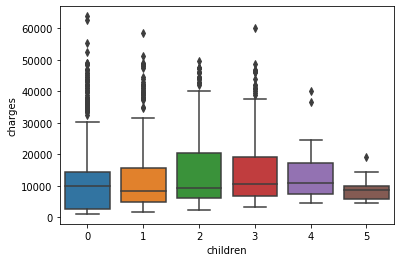

In [28]:
sns.boxplot(data['children'],data['charges']) # number of childrens have no significant relationship with charges.

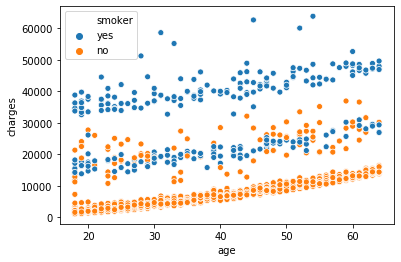

In [0]:
sns.scatterplot(data['age'],data['charges'],hue=data['smoker']) # This scatter plot also shows the effect of smoking is prevelant.

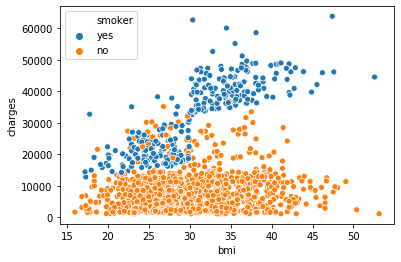

In [29]:
sns.scatterplot(data['bmi'],data['charges'],hue=data['smoker']) #scatter plot between BMI and charges, It shows no significant patterns.

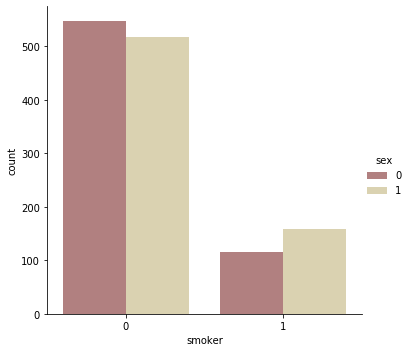

In [0]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data) #count plot to show effect of smoking by grouping data by gender.

Encoding categorical features to feed it into regression algorithm and checking correlation.

In [0]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

We can see smoker variable is strongly correlated with the charges variable.

In [40]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region     -0.006208
charges     1.000000
Name: charges, dtype: float64

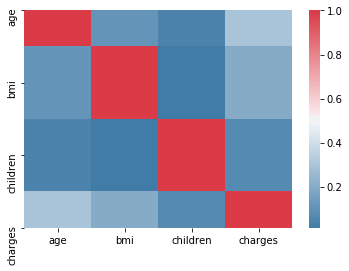

In [37]:
#creating Heatmap to check the correlation and visulaizing the above output.

sns.heatmap(data.corr(),cmap=sns.diverging_palette(240,10,as_cmap=True))

Fitting the Linear Regression model to our data. Our target variable (y) is charges and Predictor variables are (X).

In [62]:
x = data.drop(['charges'], axis = 1)
y = data.charges

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 17) #Splitting data for train and test

lr = LinearRegression().fit(x_train,y_train) # fitting the model

y_train_pred = lr.predict(x_train) #model prediction on training data

y_test_pred = lr.predict(x_test) #model prediction on test data

print(lr.score(x_test,y_test)) # Checking the modele on holdout set

#np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))  #RMSE Value for our model, something is wrong here.

0.7549094316422011


Trying to improve model accuracy by Scaling (MinMaxScaling.)

In [63]:
mm_scaler = preprocessing.MinMaxScaler()
X_train_minmax = mm_scaler.fit_transform(x_train)  #scaling the input variables of training set
X_test_minmax = mm_scaler.transform(x_test) #scaling the input variables of test set

plr = LinearRegression().fit(X_train_minmax,y_train) #fitting to model

Y_train_pred = plr.predict(X_train_minmax) #prediction on training set
Y_test_pred = plr.predict(X_test_minmax)   #prediction on test set

print(plr.score(X_test_minmax,y_test)) # A improvement of 6.661338147750939e-16 can be seen.



0.7549094316422018


Conclusion:

Many more changes can be used to improve the model. We can changes the scaling method, We can used lasso or ridge regression as well.

Our current model shows 75% of accuracy which is good for a simple model.